# Getting Started with CNN

***Hi I am creating this notebook as a note to self as well as for making CNNs easy***
When  I first came across with the idea of Deep learning and Convutional Nueral Network, it overwhelmed as well as excited me, so here I'll be sharing my learning and also will help you understand cnn better.

In this notebook I'll deal with Minst Dataset,
I'll try my best to explain Each and everything thouroughly, also **I managed to achieve 99+% accuracy, so stay tuned**
 **If you are new to CNN or deep learning please look into this notebook it will learning easy**

# Content of the Notebook
1. Data importing,preparation and visulisation
2. Data Augmentation
3. Buiding Model(in this I will explain CNN)
4. Model fitting
5. Model Evaluation
6. Result Generation

**Before starting I would request you to please upvote this notebook because It has taken a large amount of time and efforts ,and an upvote will motivate me to make more such content, and give back to the community.**

# Understanding the problem:
MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

***In this competition, our goal is to correctly identify digits from a dataset of tens of thousands of handwritten images.***

**Importing necessary libraries**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,MaxPool2D,Flatten,Activation,Dense,Dropout,BatchNormalization
from keras.models import Sequential
from sklearn.metrics import confusion_matrix
from keras.optimizers import Adam


Importing Data

In [ ]:
train = pd.read_csv('../input/digit-recognizer/train.csv')
test = pd.read_csv('../input/digit-recognizer/test.csv')

In [ ]:
train.head()

**Here labels are the digits which we have to recognize**

In [ ]:
train.info(),train.shape

**Plotting labels and checking their frequency**

In [ ]:
sns.countplot(train['label'])
plt.xlabel('Digits')
plt.ylabel('Frequency')
plt.show()

In [ ]:
test.head()

In [ ]:
test.shape

**Dividing the train data set into dependent(labels) and independent(pixels) features**

In [ ]:
y_train = train['label'] #dependent_feature

In [ ]:
X_train = train.drop(['label'],axis=1)

In [ ]:
X_train.head()

# What is preprocessing and Why should i scale my data?
 Data preprocessing is simply a data mining technique which is used to transform the raw data in a useful and efficient format.
 
 Deep learning neural network models learn a mapping from input variables to an output variable.As such, ***the scale and distribution of the data drawn from the domain may be different for each variable.Input variables may have different units (e.g. feet, kilometers, and hours) that, in turn, may mean the variables have different scales.Differences in the scales across input variables may increase the difficulty of the problem being modeled.***
A target variable with a large spread of values, in turn, may result in large error gradient values causing weight values to change dramatically, making the learning process unstable.
** *Scaling input and output variables is a critical step in using neural network models***.



In [ ]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0


In [ ]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [ ]:
y_train

Converting y_train to categorical variable, you ask why?
We have to one hot encode integer data before passing it to our model


In [ ]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(y_train, num_classes = 10)


In [ ]:
Y_train

***Splitting Train dataset into training and validation dataset***

In [ ]:
X_train,X_val,Y_train,Y_val= train_test_split(X_train,Y_train)


***Plotting an example of Image data from the training dataset***

In [ ]:
g = plt.imshow(X_train[7][:,:,0])

# Convutional Neural Network
1. ***What is Convutional Neural Network?***
A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. The pre-processing required in a ConvNet is much lower as compared to other classification algorithms.

***The architecture of a ConvNet is analogous to that of the con
conectivity pattern of Neurons in the Human Brain and was inspired by the organization of the Visual Cortex***

2. ***How Convutional Neural Networl work?***

https://e2eml.school/how_convolutional_neural_networks_work.html
https://www.analyticsvidhya.com/blog/2017/06/architecture-of-convolutional-neural-networks-simplified-demystified/

Please go trough the above links to get better understanding at the working of the CNN,

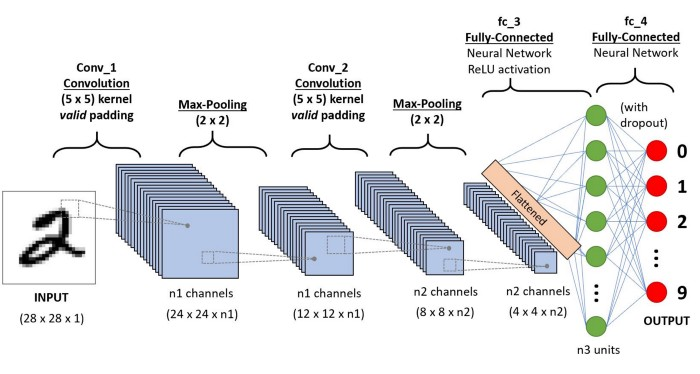

In [ ]:
def build_model():
    model = Sequential()

    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))


    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = "softmax"))

    return model

#   How I built my model?

Here I've created a function build_model,
**Defining Cnn's Architecture**
Most simply, we can compare an architecture with a building. It consists of walls, windows, doors, et cetera – and together these form the building. Explaining what a neural network architecture is benefits from this analogy. Put simply, it is a collection of components that is put in a particular order. The components themselves may be repeated and also may form blocks of components. Together, these components form a neural network: in this case, a CNN to be precise.

So the first step was to decide the model type as Seuential,**A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor**.
So basically,In a sequential layer there is one input and one output, and then the output is fed into another layer(can be seen, in the picture later)

The next step is to define the layers of single Network or Architechture,
1. Convulutional layer:-   
What a Convutional layer does, it basically perform a element-wise operation with filters(used for eedge detetction) as shown here:
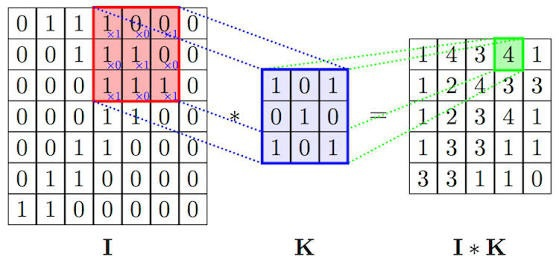


2. Batch Normalisation:-
To increase the stability of a neural network, batch normalization normalizes the output of a previous activation layer by subtracting the batch mean and dividing by the batch standard deviation.
batch normalization allows each layer of a network to learn by itself a little bit more independently of other layers.
3. Another Convutional layer:-
It perform the same action as the previous layer
4. Max Pooling layer:-
Sometimes when the images are too large, we would need to reduce the number of trainable parameters. It is then desired to periodically introduce pooling layers between subsequent convolution layers. Pooling is done for the sole purpose of reducing the spatial size of the image.
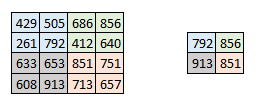



5. Dropout Layer:- 
Dropout is a technique used to improve over-fit on neural networks, Basically during training half of neurons on a particular layer will be deactivated. This improve generalization because force your layer to learn with different neurons the same "concept". During the prediction phase the dropout is deactivated. 

Then we'll repeat the same layer three times 
*All the layers other than output layer will have ReLu activation In a neural network, the activation function is responsible for transforming the summed weighted input from the node into the activation of the node or output for that input. The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero*. 

**Output layer**

6. Flatten layer:- 
In this lyaer we are literally going to flatten our pooled feature map into a column like in the image below.
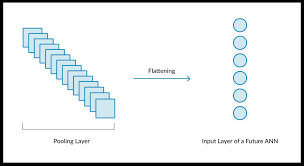

7. Dense layer:- 
The dense layer is a fully connected layer, meaning all the neurons in a layer are connected to those in the next layer.A densely connected layer provides learning features from all the combinations of the features of the previous layer

**For the fully connected layer the activation function is Softmax: which is used for multiclass classifiaction**

In [ ]:
model= build_model()

# Compiling the model
model.compile is used to compile the model the loss is Categoriacal crossentopy since we are doing multiclass classification, one can use Binary crossentropy for binary classification,
The opitimizer is Adam,they basically optimize loss and make trainning better and fast to read more
https://algorithmia.com/blog/introduction-to-optimizers,
https://towardsdatascience.com/how-to-train-neural-network-faster-with-optimizers-d297730b3713
please go through above links

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [ ]:
model.summary()

# plotting model
Everything that I've explained earlier can be understood in a better way with help of this

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


# Data Augmentation:
Data augmentation is a strategy that enables practitioners to significantly increase the diversity of data available for training models, without actually collecting new data. Data augmentation techniques such as cropping, padding, and horizontal flipping are commonly used to train large neural networks.
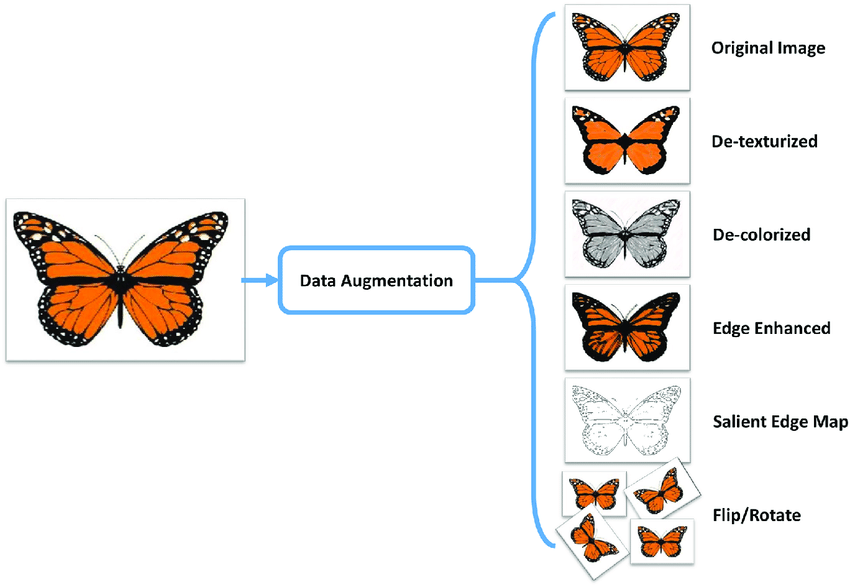

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)# randomly flip images
datagen.fit(X_train)

In [ ]:
batch_size=64

# Fitting the model:-
We are using model.fit_generator that takes the augmented data, I've defined epochs(number of times we will go through the model) as 20 (the larger the number of epochs the better the accuracy).
For the sake of notebook purpose I've taken it as 20, if you"ll fork it change it to 50/60

In [ ]:
hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=64),
                           steps_per_epoch=len(X_train)//batch_size,
                           epochs=20, #Increase this when not on Kaggle kernel
                           verbose=1,  #1 for ETA, 0 for silent
                           validation_data=(X_val[:400,:], Y_val[:400,:]))

In [ ]:
final_loss, final_acc = model.evaluate(X_val, Y_val, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))


# Evaluating Model:-
This is the plot of model training and we can clearly see the decreasing loss and increasing accuracy

In [ ]:
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist.history['accuracy'], color='b')
plt.plot(hist.history['val_accuracy'], color='r')
plt.show()


Confusion Matrix for better understanding of True positive and Negative

In [ ]:
y_hat_val = model.predict(X_val)

In [ ]:
y_pred = np.argmax(y_hat_val, axis=1)
y_true = np.argmax(Y_val, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(cm)

# Creating Prediction

In [ ]:
y_hat = model.predict(test, batch_size=64)

In [ ]:
y_pred = np.argmax(y_hat,axis=1)

**This is the notebook I've created  for  learning purpose, I've missed out following thing (for keeping it short and not giving too much information in one notebook)**
1. Hyperparameter tunning :- 
Can done with the help of GridSearchCV, it helps you select the best parameters for your model,
2. Callbacks:-
Callback is a technique that prevents overfitting, Earlystopping and model checkpoint are few examples of callbacks


***If you liked this notebook and it helped you in learnig something please upvote,
It has taken a large amount of time, and an upvote will motivate me to make more such content, and give back to the community. 
Thanks for reading.
Feedbacks and Suggestions are welcomed.****